# In this paper I'm looking for cosmological variantions parameters acroos the sky (Gaztañaga & Fosalba,2020)

In [19]:
!pip install corner

In [20]:
# Importing libraries
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
%matplotlib inline
# Import the NaMaster python wrapper
import pymaster as nmt
import getdist
from getdist import plots, MCSamples
import corner

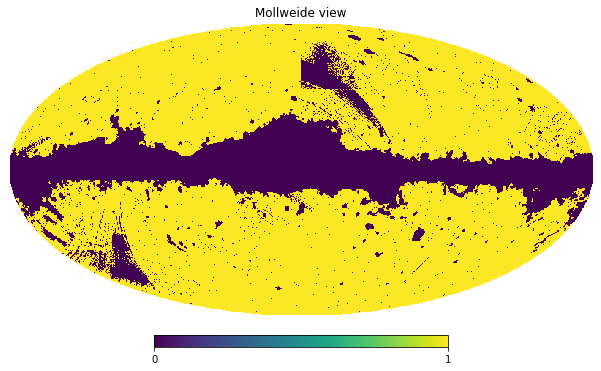

In [21]:
# Reading the map and masks
planck_map = hp.read_map('/home/akozameh/cmblss/data/COM_CMB_IQU-smica_2048_R3.00_oe2.fits')
m_1 = hp.read_map('/home/akozameh/cmblss/data/COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits')
m_2 = hp.read_map('/home/akozameh/cmblss/data/COM_Mask_CMB-HM-Misspix-Mask-Int_2048_R3.00.fits')

# Convert masks to numpy arrays with boolean dtype
m_1 = np.array(m_1, dtype=bool)
m_2 = np.array(m_2, dtype=bool)

# Combine masks using AND (common mask + Odd-Even missing pixels)
combined_mask = m_1 & m_2

# Visualize the mask
hp.mollview(combined_mask)

In [22]:
hp.write_map("combined_mask.fits", combined_mask, overwrite=True)

setting the output map dtype to [dtype('bool')]


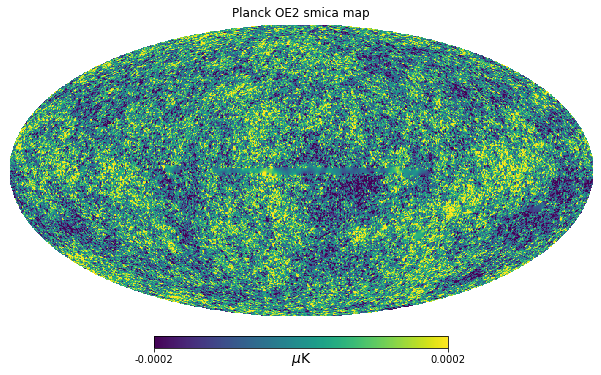

In [23]:
hp.mollview(planck_map, min=-200e-6, max=200e-6, title='Planck OE2 smica map', unit ='$\mu$K')     

In [24]:
# Masked map
#mask=hp.read_map('/home/akozameh/cmblss/data/COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits')
mask_1=hp.read_map('/home/akozameh/cmblss/code/cmblss-main/combined_mask.fits')
smica_masked=hp.ma(planck_map)
smica_masked.mask=np.logical_not(mask_1)


In [25]:
# Smoothin the map
smica_masked=hp.smoothing(smica_masked, fwhm=(np.radians(1.0)))


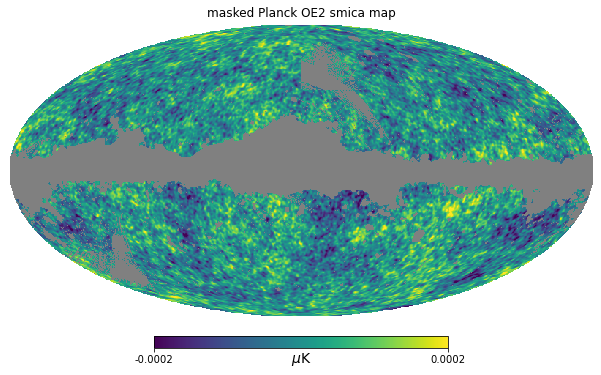

In [26]:
hp.mollview(smica_masked,min=-200e-6, max=200e-6, title='masked Planck OE2 smica map', unit ='$\mu$K')

In [27]:
# Number of pixels of map at this resolution
NPIX = hp.nside2npix(nside)
print(NPIX)

192


In [28]:
# We can retrieve the colalitude and longitude of each pixels on the map
theta, phi = hp.pix2ang(nside=4, ipix=np.arange(NPIX))
vec=hp.ang2vec(theta, phi)
print(vec)

[[ 1.43583841e-01  1.43583841e-01  9.79166667e-01]
 [-1.43583841e-01  1.43583841e-01  9.79166667e-01]
 [-1.43583841e-01 -1.43583841e-01  9.79166667e-01]
 [ 1.43583841e-01 -1.43583841e-01  9.79166667e-01]
 [ 3.69230882e-01  1.52940439e-01  9.16666667e-01]
 [ 1.52940439e-01  3.69230882e-01  9.16666667e-01]
 [-1.52940439e-01  3.69230882e-01  9.16666667e-01]
 [-3.69230882e-01  1.52940439e-01  9.16666667e-01]
 [-3.69230882e-01 -1.52940439e-01  9.16666667e-01]
 [-1.52940439e-01 -3.69230882e-01  9.16666667e-01]
 [ 1.52940439e-01 -3.69230882e-01  9.16666667e-01]
 [ 3.69230882e-01 -1.52940439e-01  9.16666667e-01]
 [ 5.63097270e-01  1.50881459e-01  8.12500000e-01]
 [ 4.12215811e-01  4.12215811e-01  8.12500000e-01]
 [ 1.50881459e-01  5.63097270e-01  8.12500000e-01]
 [-1.50881459e-01  5.63097270e-01  8.12500000e-01]
 [-4.12215811e-01  4.12215811e-01  8.12500000e-01]
 [-5.63097270e-01  1.50881459e-01  8.12500000e-01]
 [-5.63097270e-01 -1.50881459e-01  8.12500000e-01]
 [-4.12215811e-01 -4.12215811e-

In [12]:
vec.shape

(192, 3)

In [14]:
# We set of the disc at 60 degrees to perform our analysis
radius=np.radians(60.)
discs=[]
for v in vec:
    disc=hp.query_disc(nside,v,radius)
    discs.append(disc)
# `discs` now contains a list of arrays with pixel indices for each queried disc

In [24]:
nside_m = 16
smica_masked_m = hp.ud_grade(smica_masked, nside_m)
mask_1_m = hp.ud_grade(mask_1, nside_m)


In [31]:
# Create a total mask for each disc 
final_masks=[]
for disc in discs:
    disc_mask = np.zeros(hp.nside2npix(nside_m), dtype=bool)
    disc_mask[disc] = True
    disc_mask=hp.ud_grade(disc_mask, nside_m)
    final_mask = disc_mask & mask_1_m
    final_masks.append(final_mask)
print(final_masks)

[array([ True,  True,  True, ..., False, False, False]), array([ True,  True,  True, ..., False, False, False]), array([ True,  True,  True, ..., False, False, False]), array([ True,  True,  True, ..., False, False, False]), array([ True,  True,  True, ..., False, False, False]), array([ True,  True,  True, ..., False, False, False]), array([ True,  True,  True, ..., False, False, False]), array([ True,  True,  True, ..., False, False, False]), array([ True,  True,  True, ..., False, False, False]), array([ True,  True,  True, ..., False, False, False]), array([ True,  True,  True, ..., False, False, False]), array([ True,  True,  True, ..., False, False, False]), array([ True,  True,  True, ..., False, False, False]), array([ True,  True,  True, ..., False, False, False]), array([ True,  True,  True, ..., False, False, False]), array([ True,  True,  True, ..., False, False, False]), array([ True,  True,  True, ..., False, False, False]), array([ True,  True,  True, ..., False, False, 

In [32]:
np.array(final_masks).shape

(192, 3072)

TypeError: NumPy boolean array indexing assignment requires a 0 or 1-dimensional input, input has 2 dimensions

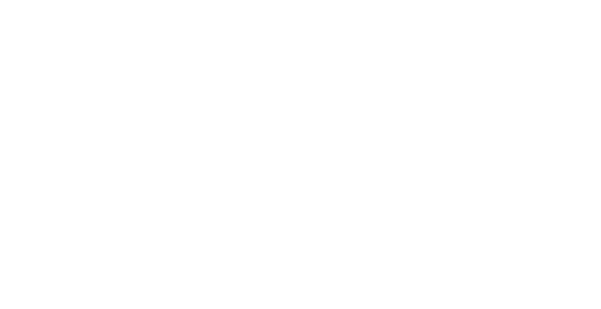

In [30]:
hp.mollview(np.array(final_masks))